In [10]:
import cv2
import pandas as pd
import glob

In [56]:
path = "faces-datamad0820"

faceFiles = [
    *glob.glob(f"{path}/todas_heterogeneas/**/*.jpg"),
    *glob.glob(f"{path}/todas_heterogeneas/**/*.JPG")
]
faceFiles

['faces-datamad0820/todas_heterogeneas/Ana/8.jpg',
 'faces-datamad0820/todas_heterogeneas/Ana/9.jpg',
 'faces-datamad0820/todas_heterogeneas/Ana/4.jpg',
 'faces-datamad0820/todas_heterogeneas/Ana/5.jpg',
 'faces-datamad0820/todas_heterogeneas/Ana/7.jpg',
 'faces-datamad0820/todas_heterogeneas/Ana/6.jpg',
 'faces-datamad0820/todas_heterogeneas/Ana/2.jpg',
 'faces-datamad0820/todas_heterogeneas/Ana/3.jpg',
 'faces-datamad0820/todas_heterogeneas/Ana/1.jpg',
 'faces-datamad0820/todas_heterogeneas/Ana/0.jpg',
 'faces-datamad0820/todas_heterogeneas/Dani/8.jpg',
 'faces-datamad0820/todas_heterogeneas/Dani/9.jpg',
 'faces-datamad0820/todas_heterogeneas/Dani/4.jpg',
 'faces-datamad0820/todas_heterogeneas/Dani/5.jpg',
 'faces-datamad0820/todas_heterogeneas/Dani/7.jpg',
 'faces-datamad0820/todas_heterogeneas/Dani/6.jpg',
 'faces-datamad0820/todas_heterogeneas/Dani/2.jpg',
 'faces-datamad0820/todas_heterogeneas/Dani/3.jpg',
 'faces-datamad0820/todas_heterogeneas/Dani/1.jpg',
 'faces-datamad0820/to

In [57]:
pics = dict()
for foto in faceFiles:
    label = foto.split("/")[-2]
    pic = foto
    if label in pics:
        pics[label].append(pic)
    else:
        pics[label] = [pic]

In [58]:
im = []
for k,v in pics.items():
    for a in v:
        im.append([k,a])
faces_df =  pd.DataFrame(im, columns=["label","foto"])
display(faces_df)


label                                             foto
0     Ana   faces-datamad0820/todas_heterogeneas/Ana/8.jpg
1     Ana   faces-datamad0820/todas_heterogeneas/Ana/9.jpg
2     Ana   faces-datamad0820/todas_heterogeneas/Ana/4.jpg
3     Ana   faces-datamad0820/todas_heterogeneas/Ana/5.jpg
4     Ana   faces-datamad0820/todas_heterogeneas/Ana/7.jpg
..    ...                                              ...
143  Raul  faces-datamad0820/todas_heterogeneas/Raul/6.jpg
144  Raul  faces-datamad0820/todas_heterogeneas/Raul/2.jpg
145  Raul  faces-datamad0820/todas_heterogeneas/Raul/3.jpg
146  Raul  faces-datamad0820/todas_heterogeneas/Raul/1.jpg
147  Raul  faces-datamad0820/todas_heterogeneas/Raul/0.jpg

[148 rows x 2 columns]

In [59]:
faces_df.label.value_counts()

Raul           10
Diego_Lopez    10
Laura          10
Ana            10
Silvia         10
Dani           10
Irene          10
Javi           10
Juan           10
Carlos         10
Ras            10
Vanesuki       10
Kevin          10
Joyce           9
Paula           9
Name: label, dtype: int64

In [60]:
import random
who = random.choice(faces_df.label)
missing = pics[who]

In [61]:
missing

['faces-datamad0820/todas_heterogeneas/Kevin/8.jpg',
 'faces-datamad0820/todas_heterogeneas/Kevin/9.jpg',
 'faces-datamad0820/todas_heterogeneas/Kevin/4.jpg',
 'faces-datamad0820/todas_heterogeneas/Kevin/5.jpg',
 'faces-datamad0820/todas_heterogeneas/Kevin/7.jpg',
 'faces-datamad0820/todas_heterogeneas/Kevin/6.jpg',
 'faces-datamad0820/todas_heterogeneas/Kevin/2.jpg',
 'faces-datamad0820/todas_heterogeneas/Kevin/3.jpg',
 'faces-datamad0820/todas_heterogeneas/Kevin/1.jpg',
 'faces-datamad0820/todas_heterogeneas/Kevin/0.jpg']

[(291, 687, 222, 223), (55, 534, 108, 107), (462, 414, 107, 108)]


array([[169, 176, 180, ...,  14,  16,  16],
       [174, 170, 175, ...,  13,  18,  17],
       [154, 165, 175, ...,  14,  19,  17],
       ...,
       [ 55,  58,  66, ..., 102, 106, 104],
       [ 62,  64,  65, ..., 102, 108, 104],
       [ 50,  54,  61, ..., 103, 104, 107]], dtype=uint8)

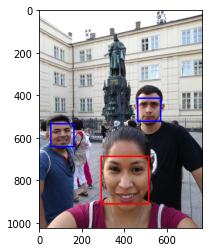

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import face_recognition

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

def extractFace(picFile, method="recognition", debug=False):
    im = cv2.imread(picFile)    
    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    plt.imshow(im_bw, cmap="gray")
    # Face detection, OJO: esto detecta multiples caras
    if method == "recognition":
        faces = face_recognition.face_locations(im_bw)
        faces = [(l,t,r-l,b-t) for t,r,b,l in faces]
    else:
        faces = face_cascade.detectMultiScale(im_bw, 2, 4)

    if len(faces) == 0:
        print(f"Warning: no face detected on {picFile}")
        return 
    
    if debug:
        print(faces)
    selected_face = faces[0]
    discard_faces = faces[1:]
    
    if debug:
        debug_squares = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        # plot the invalid squares in blue
        for face in discard_faces:
            x,y,w,h = face
            debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(0, 0, 255) ,5)
        # plot the selected face in red
        x,y,w,h = selected_face
        debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(255, 0, 0) ,5)

        plt.imshow(debug_squares)

            
    # extract selected face as B&W 
    x,y,w,h = selected_face
    cara = im_bw[y:y+h,x:x+h]    
    return cara

    
    
    
extractFace(missing[1], debug=True)

[(344, 136, 90, 90)]
[(291, 687, 222, 223), (55, 534, 108, 107), (462, 414, 107, 108)]
[(161, 290, 385, 385), (563, 291, 223, 223)]
[(482, 204, 43, 43), (366, 216, 51, 52), (596, 193, 52, 52)]
[(285, 534, 89, 90), (593, 484, 90, 90)]
[(366, 263, 185, 186), (748, 295, 108, 107), (52, 379, 267, 268), (199, 211, 107, 108), (569, 199, 108, 108)]
[(241, 313, 321, 321)]
[(124, 297, 129, 129)]
[(409, 350, 267, 267)]
[(626, 308, 62, 62), (254, 329, 74, 74), (478, 304, 74, 74), (515, 84, 52, 52), (631, 72, 51, 52), (285, 84, 52, 52), (429, 84, 52, 52), (741, 134, 36, 36)]


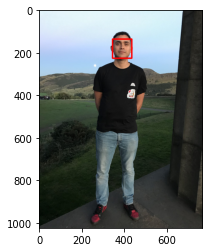

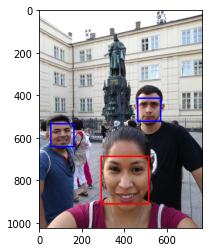

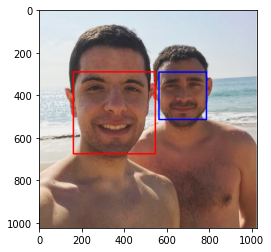

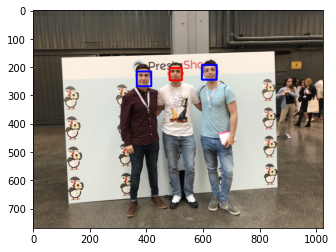

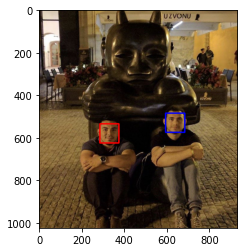

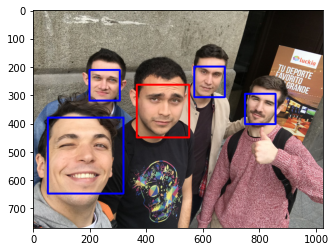

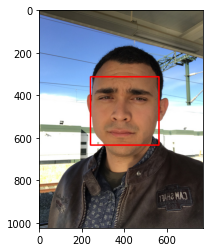

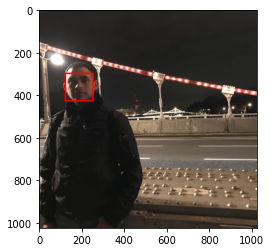

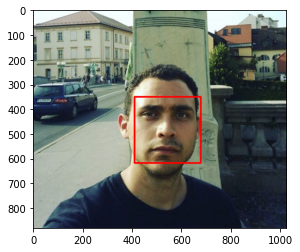

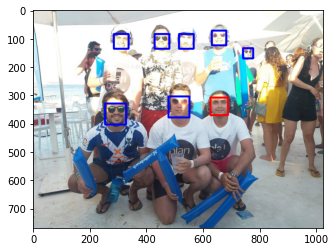

In [63]:
for missingPic in missing:
    plt.figure()
    extractFace(missingPic, debug=True)

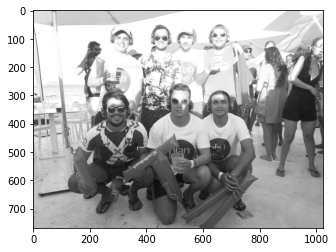

In [64]:
# Extract all faces
missingFaces = [extractFace(missingPic) for missingPic in missing]

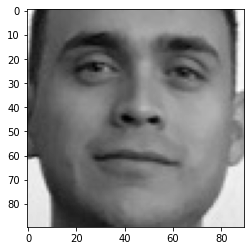

In [65]:
plt.imshow(missingFaces[0], cmap="gray")

In [66]:
import numpy as np

# Filter out invalid faces
missingFaces = [a for a in missingFaces if isinstance(a, np.ndarray)]

In [67]:
# Normalize the size of all faces
dim = (100,100)
missingNormalized = [cv2.resize(a, dim, interpolation=cv2.INTER_AREA) for a in missingFaces]

In [68]:
[a.shape for a in missingNormalized]

[(100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100)]

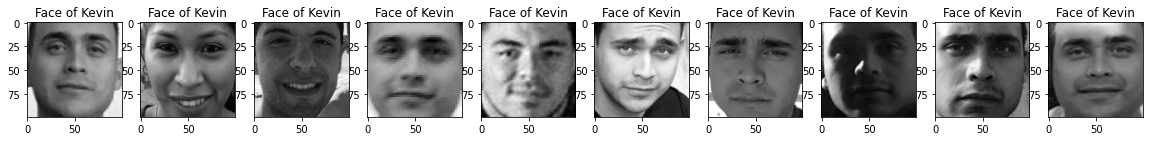

In [69]:
def printMyFace(facesImages, label):
    plt.figure(figsize=(20,5))
    for i,a in enumerate(facesImages):
        plt.subplot(1,len(facesImages), i + 1)
        plt.imshow(a, cmap="gray")
        plt.title(f"Face of {label}")
    plt.show()

printMyFace(missingNormalized, label=who)

In [70]:
# Wrap all in one fn

def processFiles(files, dim=(100,100)):
    output_faces = []
    for incomingFile in files: 
        face = extractFace(incomingFile)
        if  isinstance(face, np.ndarray):
            face = cv2.resize(face, dim, interpolation=cv2.INTER_AREA)
            output_faces.append(face)
    return output_faces
            


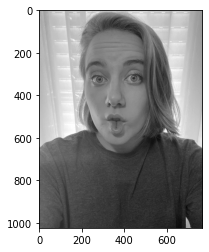

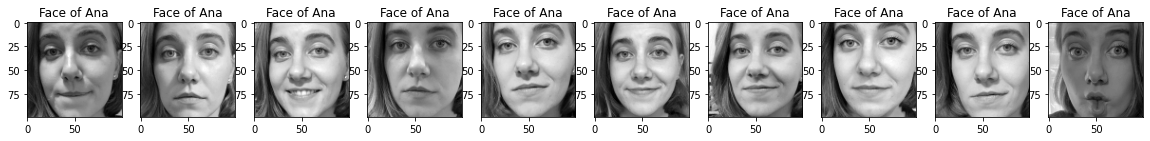

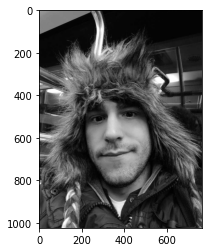

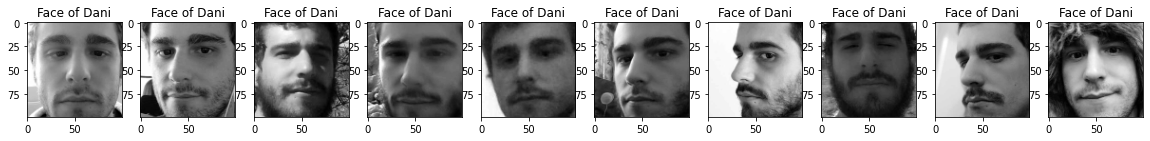

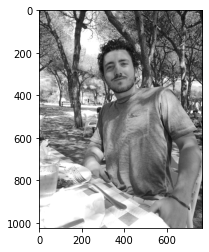

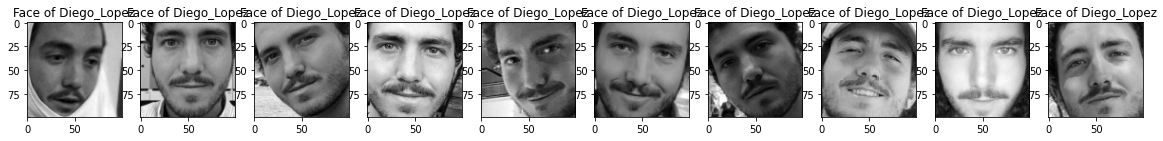

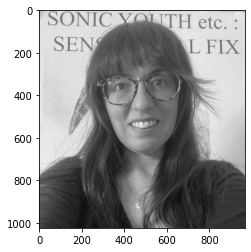

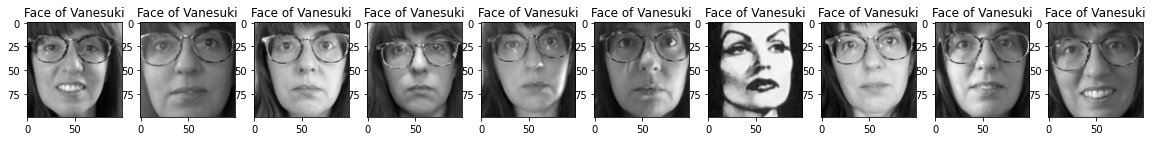

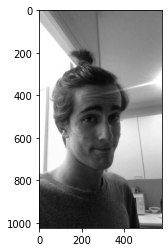

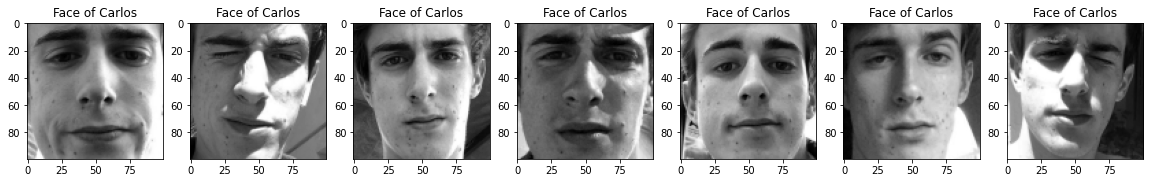

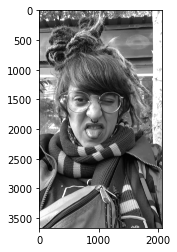

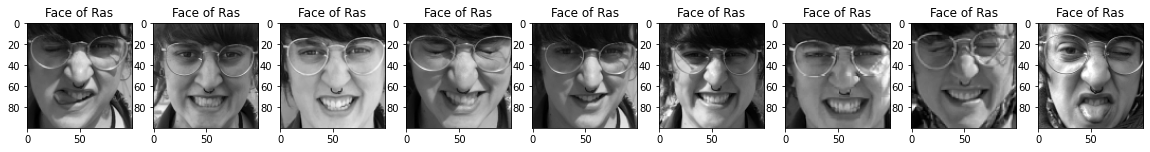

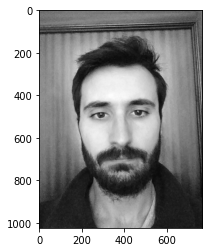

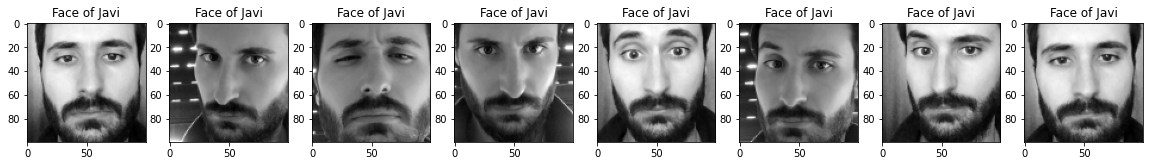

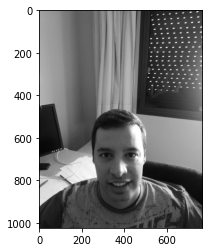

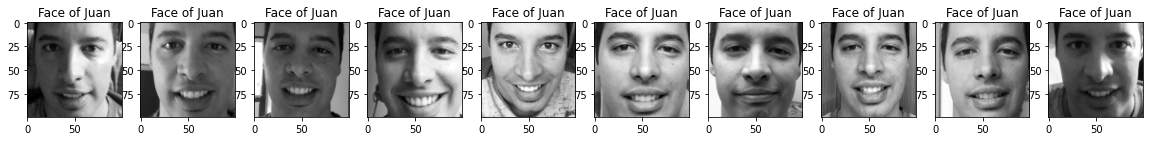

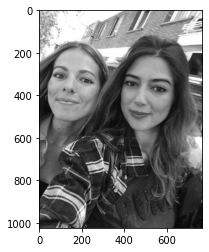

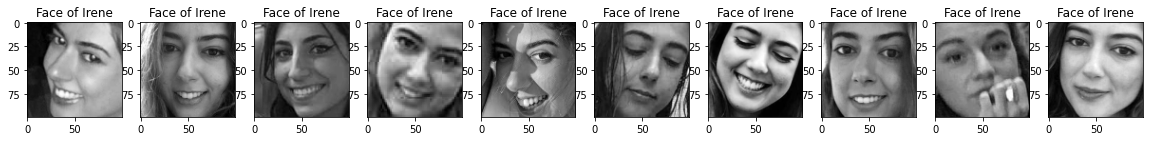

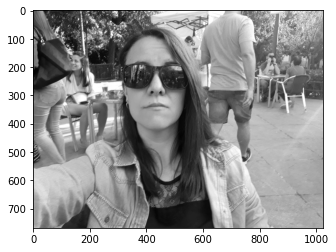

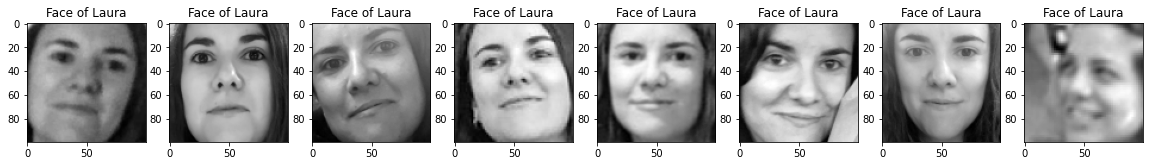

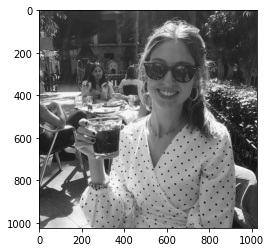

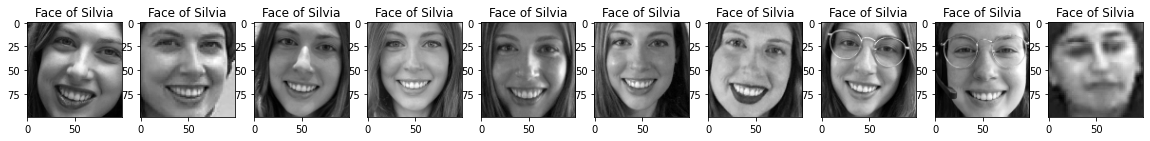

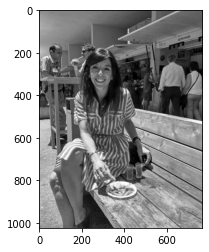

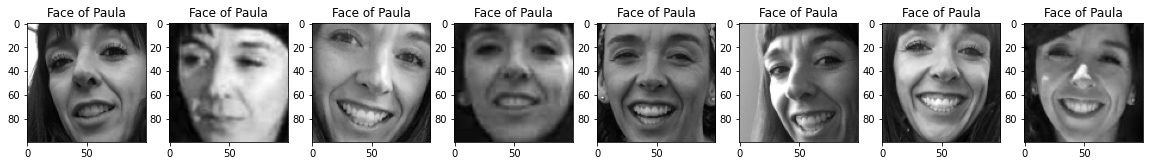

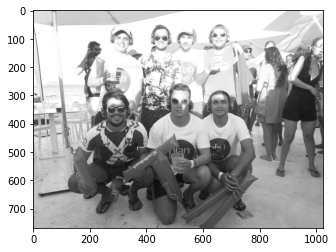

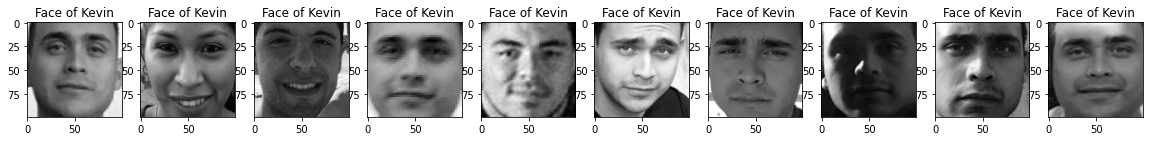

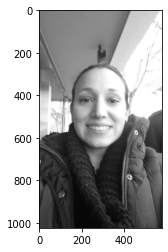

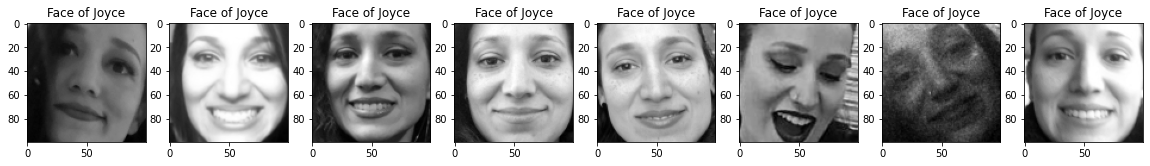

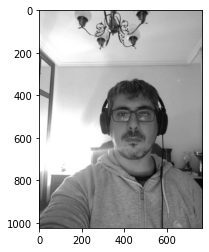

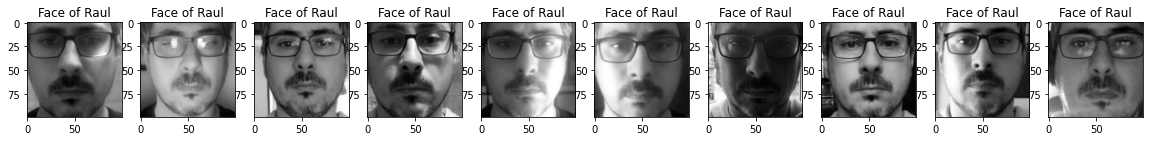

In [71]:
for label,fotos in pics.items():
    faces = processFiles(fotos)
    printMyFace(faces,label=label)


array([-0.07936232,  0.10368513, -0.02010809, -0.06997611, -0.11134573,
        0.01713829, -0.05608897, -0.09866791,  0.16680977, -0.06503478,
        0.17457226, -0.04021211, -0.30864489,  0.02780806, -0.01152167,
        0.07868836, -0.16941687, -0.15358618, -0.06547917, -0.09274205,
       -0.0224322 ,  0.02546709,  0.02832062,  0.07517046, -0.09676342,
       -0.30200922, -0.10147307, -0.1347685 ,  0.01695782, -0.13070057,
       -0.05190629, -0.03718057, -0.19715601, -0.11225127,  0.04099232,
        0.07923807, -0.09607309, -0.07624455,  0.23474924,  0.07677472,
       -0.08068462,  0.00789174,  0.0507534 ,  0.31213704,  0.12743443,
        0.09145804,  0.03383242, -0.01028493,  0.08572352, -0.2759693 ,
        0.06502514,  0.15567799,  0.16833791,  0.02244124,  0.0454588 ,
       -0.15772016, -0.02396345,  0.12683429, -0.16119269,  0.212789  ,
        0.11030196, -0.09017655, -0.05509214, -0.0227587 ,  0.32338703,
        0.12151858, -0.12283537, -0.12102176,  0.17485496, -0.14

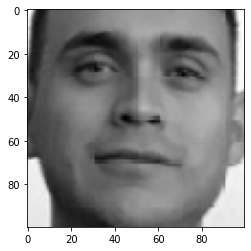

In [72]:
import face_recognition

def extractFeatures(faceIm, useFeats="face",debug=False):
    if debug:
        plt.figure()
        plt.imshow(faceIm, cmap="gray")
    if useFeats == "fft":
        fft2d = np.log(np.abs(np.fft.fft2(faceIm)))
        fft2d = fft2d[0:len(fft2d)//2,0:len(fft2d)//2]
        fft2d = fft2d[5:20,5:20]
        
        if debug:
            plt.figure()
            plt.imshow(fft2d, cmap="gray")
            print(fft2d.shape)
        
        return np.hstack(fft2d)
    elif useFeats == "face":
        imcol = cv2.cvtColor(faceIm, cv2.COLOR_GRAY2RGB)
        feats = face_recognition.face_encodings(imcol)
        if len(feats) > 0:
            return feats[0]
        return None
    
extractFeatures(missingNormalized[0], debug=True)

Processing Ana....
Processing Dani....
Processing Diego_Lopez....
Processing Vanesuki....
Processing Carlos....
Processing Ras....
Processing Javi....
Processing Juan....
Processing Irene....
Processing Laura....
Processing Silvia....
Processing Paula....
Processing Kevin....
Processing Joyce....
Processing Raul....


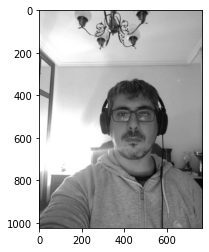

In [73]:
featurized_dataset = []
for label,fotos in pics.items():
    faces = processFiles(fotos)
    print(f"Processing {label}....")
    for i,face in enumerate(faces):
        featurized_dataset.append({
            "label":label,
            "picName":i,
            "feats":extractFeatures(face)
        })


In [74]:
df = pd.DataFrame(featurized_dataset)
df.head()

label  picName                                              feats
0   Ana        0  [-0.10096767544746399, 0.09565281122922897, 0....
1   Ana        1  [-0.06817099452018738, 0.10988569259643555, 0....
2   Ana        2  [-0.06989609450101852, 0.11674420535564423, 0....
3   Ana        3  [-0.08420487493276596, 0.11066730320453644, 0....
4   Ana        4  [-0.1079736053943634, 0.1677599400281906, 0.08...

In [75]:
df.label.value_counts()

Raul           10
Diego_Lopez    10
Ana            10
Silvia         10
Dani           10
Irene          10
Juan           10
Vanesuki       10
Kevin          10
Ras             9
Laura           8
Joyce           8
Paula           8
Javi            8
Carlos          7
Name: label, dtype: int64

In [76]:
df = df[~df.feats.isna()]

In [77]:
df.feats.isna().value_counts()

False    118
Name: feats, dtype: int64

In [78]:
y = df.label
X = np.vstack(df.feats)

In [79]:
print(X.shape,y.shape)

(118, 128) (118,)


In [80]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_numeric = le.fit_transform(y)
y_numeric

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3, 14, 14, 14, 14, 14, 14, 14, 14,
       14,  1,  1,  1,  1,  1,  1, 11, 11, 11, 11, 11, 11, 11,  5,  5,  5,
        5,  5,  5,  5,  7,  7,  7,  7,  7,  7,  7,  7,  7,  4,  4,  4,  4,
        4,  4,  4,  4,  9,  9,  9,  9,  9,  9,  9, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 10, 10, 10, 10, 10, 10, 10, 10,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  6,  6,  6,  6,  6,  6, 12, 12, 12, 12, 12, 12])

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
model = RandomForestClassifier()
#model = KNeighborsClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
model.predict(X_test)

array([ 3,  6, 10,  8, 12,  4,  2,  0,  8, 13,  9,  5, 14,  7, 14,  3,  0,
        3,  2, 13,  7,  1,  5, 11])

In [86]:
y_pred = model.predict(X_test)
pd.DataFrame({
    "pred": le.inverse_transform(y_pred),
    "real": le.inverse_transform(y_test)
})

pred         real
0   Diego_Lopez  Diego_Lopez
1         Joyce        Joyce
2         Paula        Paula
3         Kevin        Kevin
4          Raul         Raul
5         Irene        Irene
6          Dani         Dani
7           Ana          Ana
8         Kevin        Kevin
9        Silvia        Kevin
10        Laura        Kevin
11         Javi         Javi
12     Vanesuki     Vanesuki
13         Juan         Juan
14     Vanesuki          Ras
15  Diego_Lopez  Diego_Lopez
16          Ana          Ana
17  Diego_Lopez  Diego_Lopez
18         Dani         Dani
19       Silvia       Silvia
20         Juan         Juan
21       Carlos       Carlos
22         Javi         Javi
23          Ras          Ras

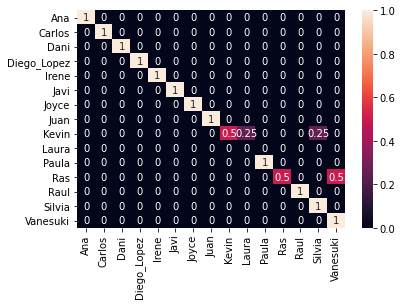

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred), normalize="true")
sns.heatmap(cm, annot=True,xticklabels=le.classes_, yticklabels=le.classes_)

In [ ]:
le.classes_